<a href="https://colab.research.google.com/github/ChallaHarika23/Aimlprogram/blob/main/Lab4_Module1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [80]:
from IPython.display import Latex as lt
#Plotting functions
#(You DON'T need to understand how these functions)

# function to plot a grid
def plotGrid(transform, unit, linestyle = ':', fig=None, ax=None):
  lim1 = -100
  lim2 = 100
  def mat2xy(start, end):
    if len(start.shape)==1:
      start = np.expand_dims(start,0)
      end = np.expand_dims(end,0)
    nan = np.ones(len(start))*np.nan
    x = np.stack((start[:,0], end[:,0], nan)).T.reshape(-1)
    y = np.stack((start[:,1], end[:,1], nan)).T.reshape(-1)
    return x, y

  def parallellines(axis, addend, lines, unit):
    addend = np.repeat(np.expand_dims(addend,0), lines*2, 0)
    unit = np.expand_dims(np.arange(-lines, lines)*unit,1)
    unit = unit-lines
    addend = addend*unit
    lines = np.expand_dims(axis,0) + addend
    return np.concatenate((lines, lines*-1))

  if fig is None:
    fig, ax = plt.subplots(figsize=(10,10))
  transform = transform.astype(np.float)
  xaxis = transform[0]
  yaxis = transform[1]

  # plot lines parallel to the x axis
  lines1= parallellines(xaxis*lim1, yaxis, 100,unit )
  lines2 = parallellines(xaxis*lim2, yaxis, 100,unit )
  x,y = mat2xy(lines1, lines2)
  plt.plot(x,y, linestyle+'k', linewidth=0.5)
  # plot x axis
  x,y = mat2xy(xaxis*lim1, xaxis*lim2)
  plt.plot(x,y,linestyle, color = '#440077')

  # plot  lines parallel to the y axis
  lines1= parallellines(yaxis*lim1, xaxis, 100,unit)
  lines2 = parallellines(yaxis*lim2, xaxis, 100,unit)
  x,y = mat2xy(lines1, lines2)
  plt.plot(x,y, linestyle+'k', linewidth=0.5)
  # plot y axis
  x,y = mat2xy(yaxis*lim1, yaxis*lim2)
  plt.plot(x,y,linestyle, color= '#aa5500')

  return fig, ax

def plotData(X, y, xlabel = 'hole', ylabel = 'bound', fig=None, ax = None):

  if fig is None:
    fig, ax = plt.subplots()
  for ii in range(nclasses):
    plt.scatter(X[y==ii,0], X[y==ii, 1])
  plt.legend([str(i) for i in range(nclasses)])
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  lim2 = X.max()
  lim1 = X.min()
  add = abs(lim1-lim2)/5
  return fig, ax


## Matrix Transformation

In [ ]:
T0 = np.array([[2,1],[1,1]])
T1 = np.array([[-2,2], [0,2]])

d1 = np.array([6,3])
d0 = np.matmul(T1, d1)

print('Data in T0 = ', d0)
print('Data in T1 = ', d1)

Data in T0 =  [-6  6]
Data in T1 =  [6 3]


<ipython-input-2-eb238eeb2a58>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  transform = transform.astype(np.float)


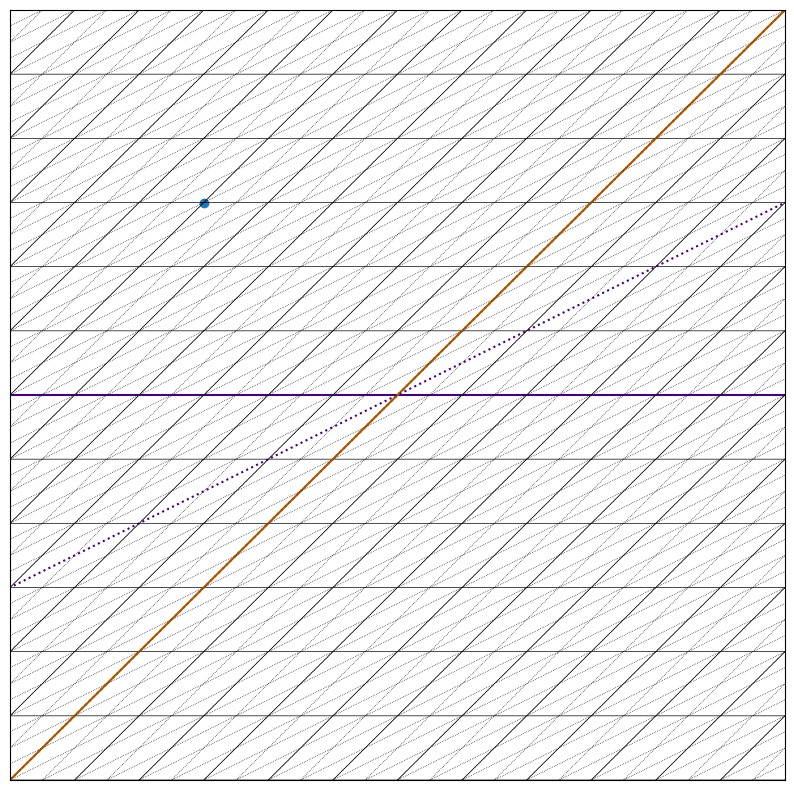

In [ ]:
fig, ax = plotGrid(T1.T, 1,'-')
plotGrid(T0.T, 1, fig=fig, ax=ax)
plt.scatter(d0[0], d0[1])
ax.set_xlim(-12,12)
ax.set_ylim(-12,12)
ax.set_xticks([]);
ax.set_yticks([]);

In [ ]:
d0_a = np.matmul(T1, d1)
d0_b = np.matmul(d1, T1.T)
print(d0_a)
print(d0_b)

[-6  6]
[-6  6]


In [ ]:
A1 = np.array([5,2])
B1 = np.array([-4,-6])
C1 = np.array([-1,3])

A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)

# function to calculate Euclidean distance:
def dist(a, b):
  dif = a-b
  sqr = dif*dif
  return np.sqrt(sqr.sum())

print('Distance between A and B in T1 = ', dist(A1, B1))
print('Distance between B and C in T1 = ', dist(B1, C1))
print('Distance between A and C in T1 = ', dist(A1, C1))
print('')
print('Distance between A and B in T0 = ', dist(A0, B0))
print('Distance between B and C in T0 = ', dist(B0, C0))
print('Distance between A and C in T0 = ', dist(A0, C0))

Distance between A and B in T1 =  12.041594578792296
Distance between B and C in T1 =  9.486832980505138
Distance between A and C in T1 =  6.082762530298219

Distance between A and B in T0 =  16.1245154965971
Distance between B and C in T0 =  21.633307652783937
Distance between A and C in T0 =  14.142135623730951


## Transformations on MNIST

In [24]:

def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary




In [25]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

nclasses = 4

# get only for the first 4 classes
train_X = train_X[train_y<nclasses]
train_y = train_y[train_y<nclasses]
test_X = test_X[test_y<nclasses]
test_y = test_y[test_y<nclasses]

train_X = train_X[::100].copy()
train_y = train_y[::100].copy()
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()


train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
#train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
#test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
train_hull = np.array([getHullPixels(i).sum() for i in train_X])
test_hull = np.array([getHullPixels(i).sum() for i in test_X])
#train_sum = np.sum(train_X, (1,2))/(28*28)
#test_sum = np.sum(test_X, (1,2))/(28*28)

train_fe = np.vstack((train_hole,train_hull)).transpose()
test_fe = np.vstack((test_hole, test_hull)).transpose()

(-150.0, 250.0)

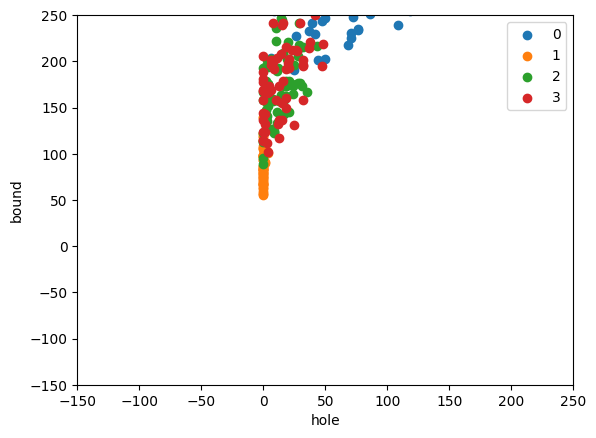

In [26]:
xlim=[-150,250]
ylim=[-150,250]
fig, ax = plotData(train_fe, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [28]:
import numpy as np
from keras.datasets import mnist
from sklearn.metrics import accuracy_score

(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

nclasses = 4

train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

train_X = train_X[::100].copy()
train_y = train_y[::100].copy()
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()

train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_hull = np.array([getHullPixels(i).sum() for i in train_X])
test_hull = np.array([getHullPixels(i).sum() for i in test_X])

train_fe = np.vstack((train_hole, train_hull)).transpose()
test_fe = np.vstack((test_hole, test_hull)).transpose()

train_fe = train_fe.reshape(train_fe.shape[0], -1)
test_fe = test_fe.reshape(test_fe.shape[0], -1)

test_pred = NN(train_fe, train_y, test_fe)

# Calculate accuracy
acc = accuracy_score(test_y, test_pred)
print('Accuracy:', acc)


Accuracy: 0.7380952380952381


In [52]:
transform = np.array([[1.5,2.5],[0,-2.5]])

train_fe_trans = np.matmul(train_fe, transform)
test_fe_trans = np.matmul(test_fe, transform)
print(transform)

[[ 1.5  2.5]
 [ 0.  -2.5]]


(-150.0, 250.0)

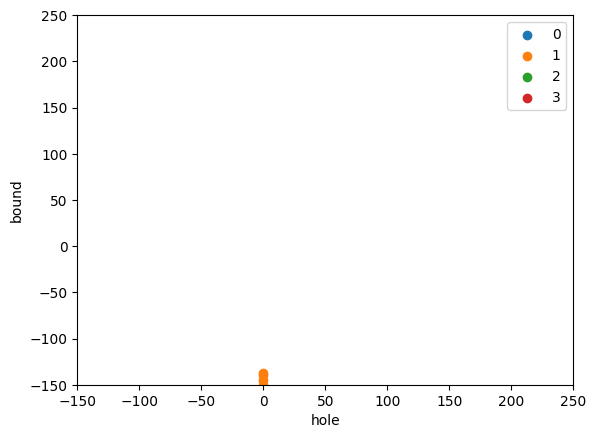

In [53]:
fig, ax = plotData(train_fe_trans, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [54]:
test_pred = NN(train_fe_trans, train_y, test_fe_trans)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform = ', acc)

Accuracy after transform =  0.7619047619047619


Questions

## 1.Experiment with different transformation matrices and check the accuracy?

[[ 0.5 -2.5]
 [ 1.5 -2.5]]
Accuracy after transform =  0.6666666666666666


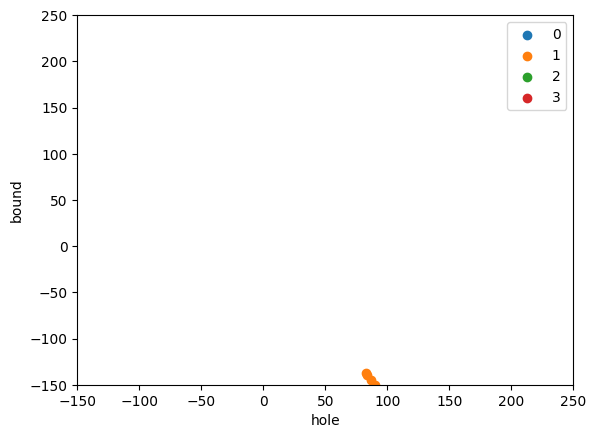

In [58]:
transform = np.array([[0.5,-2.5],[1.5,-2.5]])

train_fe_trans = np.matmul(train_fe, transform)
test_fe_trans = np.matmul(test_fe, transform)
print(transform)

fig, ax = plotData(train_fe_trans, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

test_pred = NN(train_fe_trans, train_y, test_fe_trans)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform = ', acc)

[[ 0.   1. ]
 [ 0.5 -0.5]]
Accuracy after transform =  0.6904761904761905


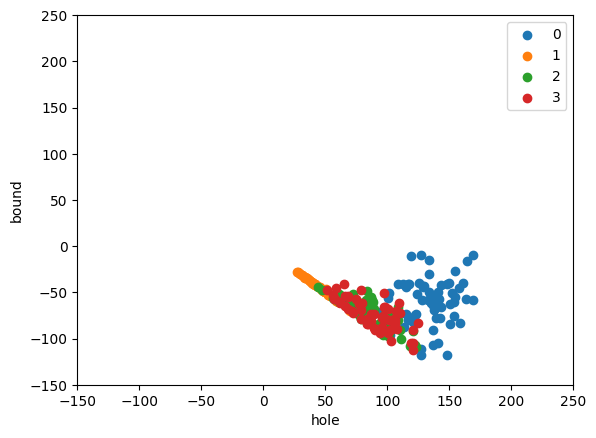

In [66]:
transform = np.array([[0,1],[0.5,-0.5]])

train_fe_trans = np.matmul(train_fe, transform)
test_fe_trans = np.matmul(test_fe, transform)
print(transform)

fig, ax = plotData(train_fe_trans, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

test_pred = NN(train_fe_trans, train_y, test_fe_trans)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform = ', acc)

2.Will the same transform used for these two features also work for other features?

 Linear transformations are useful when the underlying relationships between your features and the target variable are linear.whether the same transformation can be used for other features depends on the characteristics of those features and the problem you're solving. It's common to experiment with different transformations and techniques to find the best approach for your specific task.

## Data Normalization

In [67]:
def rescale(data):
  return (data - data.min())/(data.max() - data.min())

In [77]:
train_fe_rescaled_x = rescale(train_fe[:,0])
train_fe_rescaled_y = rescale(train_fe[:,1])
train_fe_rescaled = np.stack((train_fe_rescaled_x, train_fe_rescaled_y),1)

test_feats_rescaled_x = rescale(test_fe[:,1])
test_feats_rescaled_y = rescale(test_fe[:,0])
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y),1)

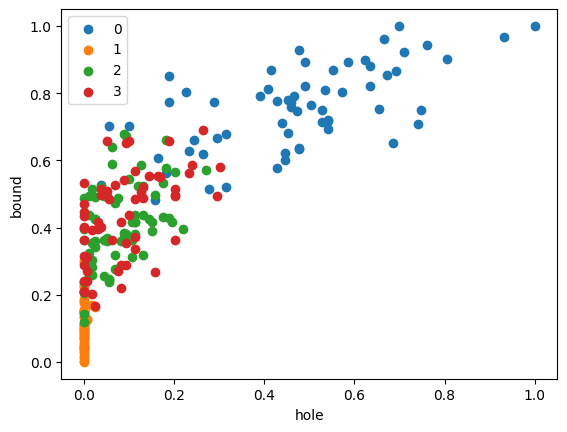

In [78]:
fig, ax = plotData(train_fe_rescaled, train_y)

In [79]:
test_pred = NN(train_fe_rescaled, train_y, test_feats_rescaled)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform = ', acc)

Accuracy after transform =  0.7142857142857143


## what is the matrix associated with the rescaling function?

The matrix associated with the rescaling function for a 2D linear transformation is a diagonal matrix, where the diagonal elements represent the scaling factors for each dimension. In your case, you are rescaling the data such that it is scaled linearly between 0 and 1 for both dimensions (x and y).

This diagonal matrix scales each dimension independently, ensuring that the range of values in each dimension is mapped to [0, 1].